In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read  Data
data = pd.read_csv(r"C:\Users\User\Downloads\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

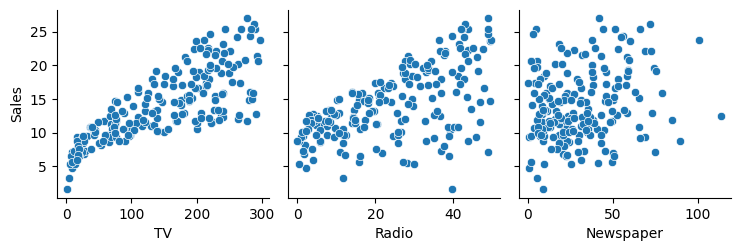

In [7]:
sns.pairplot(data , x_vars=['TV' , 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

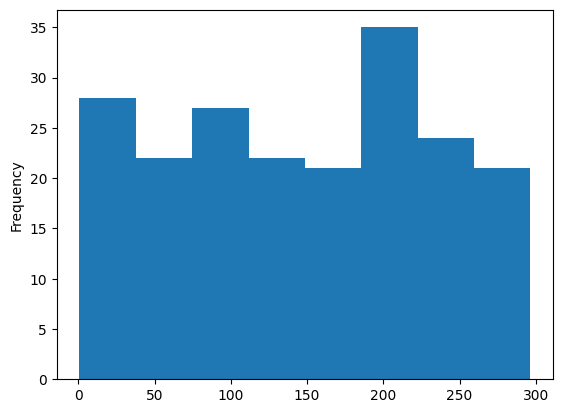

In [9]:
data['TV'].plot.hist(bins = 8)

<Axes: xlabel='Radio', ylabel='Frequency'>

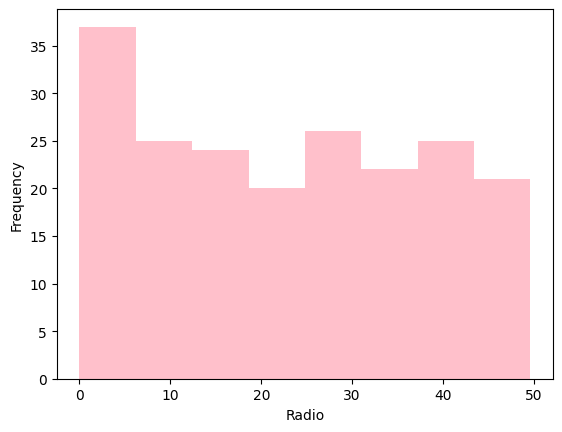

In [10]:
data['Radio'].plot.hist(bins = 8 , color = 'pink' , xlabel = 'Radio')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

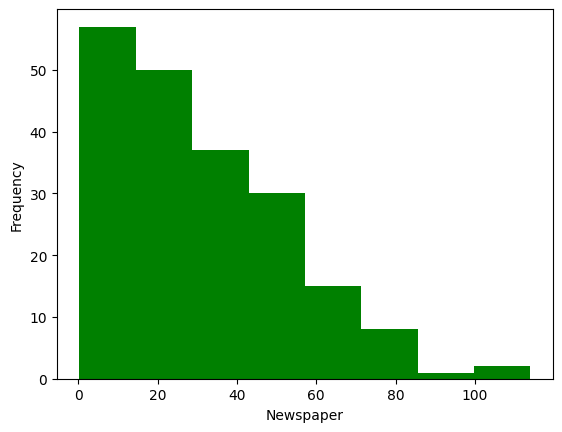

In [11]:
data['Newspaper'].plot.hist(bins = 8 , color = 'green' , xlabel = 'Newspaper')

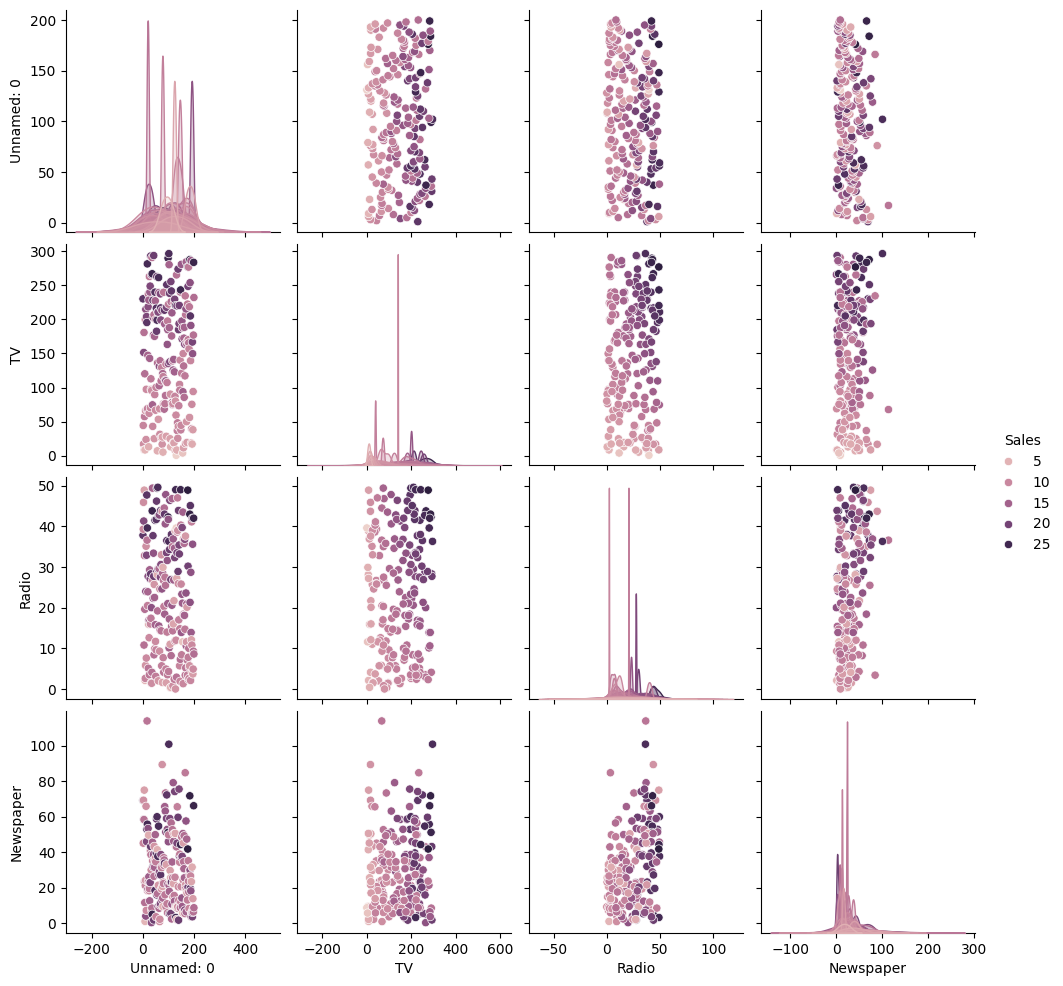

In [13]:
sns.pairplot(data = data , hue = 'Sales')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [15]:
x=data[ ['Unnamed: 0','TV', 'Radio', 'Newspaper']]
y=data[[ 'Sales' ]]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 0.8986197256096143
The test accuracy : 0.889298434057869


In [21]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
random_f_pred = random_forest.predict(x_test)

In [23]:
r2_score(y_test,random_f_pred)

0.9893550540783055